In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data1 = pd.read_csv("air_index_ml.csv")

In [5]:
data1

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all,air_pollution_index
0,89,2,329,1,1,288.28,40,121
1,67,3,330,1,1,289.36,75,178
2,66,3,329,2,2,289.58,90,113
3,66,3,329,5,5,290.13,90,20
4,65,3,329,7,7,291.14,75,281
...,...,...,...,...,...,...,...,...
33745,85,1,328,7,7,287.88,90,74
33746,70,1,24,2,2,286.95,90,81
33747,70,1,24,1,1,286.95,90,138
33748,66,1,42,6,6,285.75,90,229


In [6]:
data1.shape

(33750, 8)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   humidity             33750 non-null  int64  
 1   wind_speed           33750 non-null  int64  
 2   wind_direction       33750 non-null  int64  
 3   visibility_in_miles  33750 non-null  int64  
 4   dew_point            33750 non-null  int64  
 5   temperature          33750 non-null  float64
 6   clouds_all           33750 non-null  int64  
 7   air_pollution_index  33750 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.1 MB


In [8]:
data1.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all,air_pollution_index
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,50.458785,154.841422
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,38.871734,83.735515
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,10.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,1.000000,83.000000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,64.000000,155.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,90.000000,228.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,100.000000,299.000000


In [9]:
data1.columns

Index(['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles',
       'dew_point', 'temperature', 'clouds_all', 'air_pollution_index'],
      dtype='object')

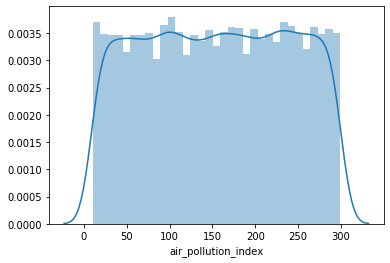

In [10]:
sns.distplot(data1["air_pollution_index"])

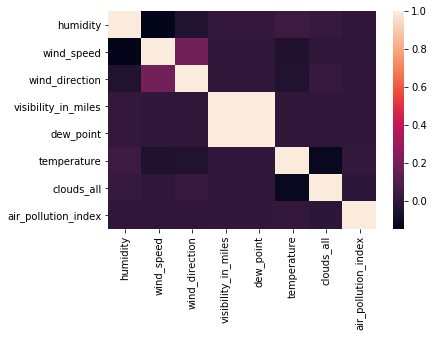

In [47]:
sns.heatmap(data1.corr())

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [52]:
scaler.fit(data1.drop('air_pollution_index',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
scaled_features = scaler.transform(data1.drop('air_pollution_index',axis=1))

In [58]:
df_feat = pd.DataFrame(scaled_features, columns=data1.columns[:-1])

In [59]:
df_feat

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all
0,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.269063
1,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,0.631348
2,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,1.017238
3,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,1.017238
4,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,0.631348
...,...,...,...,...,...,...,...
33745,0.818359,-1.156843,1.287346,0.782204,0.782204,0.582212,1.017238
33746,-0.071743,-1.156843,-1.757537,-1.163334,-1.163334,0.512887,1.017238
33747,-0.071743,-1.156843,-1.757537,-1.552441,-1.552441,0.512887,1.017238
33748,-0.309103,-1.156843,-1.577248,0.393097,0.393097,0.423436,1.017238


In [60]:
X = df_feat[['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles',
       'dew_point', 'temperature', 'clouds_all']]

In [61]:
y = data1["air_pollution_index"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lm.coef_

array([ 0.2249568 ,  0.03240539,  0.85865452, -0.01772103, -0.01772103,
        0.32577829, -0.17129599])

In [68]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=["Coeff"])

In [69]:
cdf

,Coeff
humidity,0.224957
wind_speed,0.032405
wind_direction,0.858655
visibility_in_miles,-0.017721
dew_point,-0.017721
temperature,0.325778
clouds_all,-0.171296


In [70]:
predictions = lm.predict(X_test)

In [71]:
predictions

array([154.6314371 , 155.20855255, 154.79561539, ..., 155.53065861,
       154.59754095, 154.60629112])

In [72]:
y_test

2606     187
7281      41
17448    152
29785    130
16654    120
        ... 
1378     195
22034     32
14634    177
12211    247
2509     114
Name: air_pollution_index, Length: 13500, dtype: int64

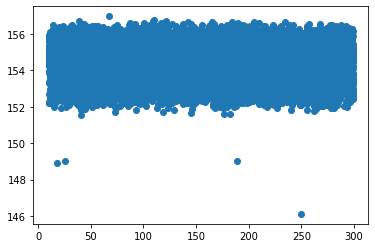

In [73]:
plt.scatter(y_test,predictions)

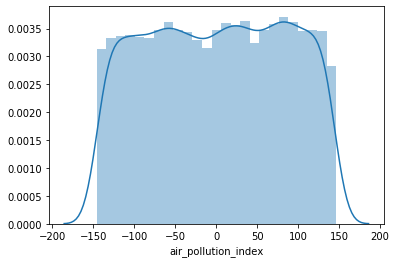

In [74]:
sns.distplot((y_test - predictions))

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test,predictions)

72.30634223695697

In [77]:
metrics.mean_squared_error(y_test,predictions)

6959.427398165745

In [78]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

83.42318261829709

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
def plot_learning_curves(model,x,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.4)
    val_errors = []
    
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(val_errors),"r-+",linewidth=2,label='validation')
    plt.legend()

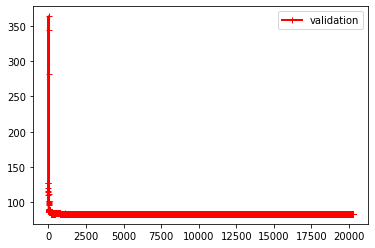

In [81]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)